In [2]:
# 필수 패키지
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns               # 정적 시각화
import plotly.express as px         # 인터랙티브 시각화(선택)

plt.rcParams["font.family"] = "Arial"   # 한글폰트 설정 필요 시 변경


In [3]:
# 데이터 로드
FILE = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx"    # ⇐ 경로만 바꿔 주세요
df   = pd.read_excel(FILE)

# 토픽 컬럼 리스트 만들기
topic_cols = [c for c in df.columns if c.startswith("DTM_Topic")]


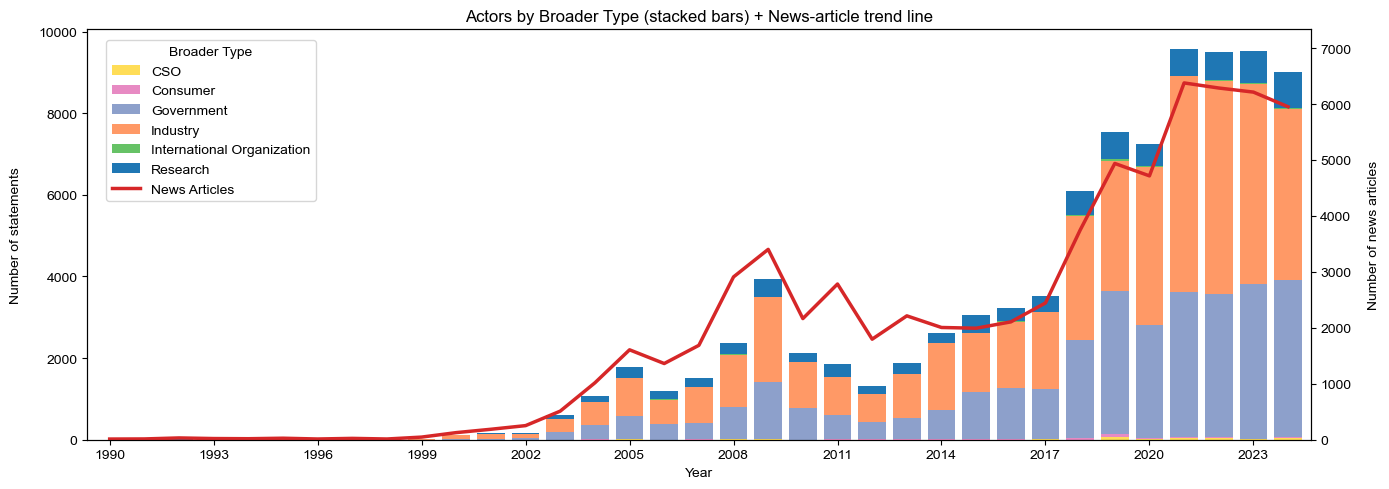

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

# ─────────────────────────────────────────────
# 0) 데이터 로딩 & 연도 int 변환
# ─────────────────────────────────────────────
df_media = pd.read_excel(
    r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\preprocessed_data_뉴스미디어.xlsx"
)

df["year"]       = pd.to_numeric(df["year"], errors="coerce").dropna().astype(int)
df_media["year"] = pd.to_numeric(df_media["year"], errors="coerce").dropna().astype(int)

# ─────────────────────────────────────────────
# 1) 피벗 & 기사 건수
# ─────────────────────────────────────────────
pivot_cnt = (
    df.groupby(["year", "broader_type"])["statement"]
      .count()
      .unstack(fill_value=0)
      .sort_index()
)

media_counts = (
    df_media["year"].value_counts().sort_index()
    .reindex(pivot_cnt.index, fill_value=0)
)

# ─────────────────────────────────────────────
# 2) Broader Type 컬러 매핑
# ─────────────────────────────────────────────
preset = {
    "Industry"                  : "#ff9966",
    "Government"                : "#8da0cb",
    "Research"                  : "#1f77b4",
    "CSO"                       : "#ffdd57",
    "International Organization": "#66c266",
    "Consumer"                  : "#e78ac3",
    #"Economic"                  : "#ff9966",
    #"Individual"                : "#e78ac3",
}
missing = [c for c in pivot_cnt.columns if c not in preset]
preset.update({c: sns.color_palette("Set2", len(missing))[i] for i, c in enumerate(missing)})
bar_colors = [preset[c] for c in pivot_cnt.columns]

# ─────────────────────────────────────────────
# 3) 시각화
# ─────────────────────────────────────────────
fig, ax1 = plt.subplots(figsize=(14, 5))

# (a) 누적 막대 (자동 범례 제거)
pivot_cnt.plot(kind="bar", stacked=True, ax=ax1,
               color=bar_colors, width=0.8, legend=False)

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of statements", labelpad=12)

x_pos = np.arange(len(pivot_cnt))
ax2   = ax1.twinx()

# (b) 뉴스 기사 추세선
ax2.plot(x_pos, media_counts.values,
         color="#d62728", linewidth=2.5, label="News Articles")
ax2.set_ylabel("Number of news articles", labelpad=12)
ax2.set_ylim(0, media_counts.values.max()*1.15)

# ─────────────────────────────────────────────
# 4) X축 눈금 간격 (최대 15개 표시)
# ─────────────────────────────────────────────
max_ticks = 15
step = max(1, int(np.ceil(len(x_pos) / max_ticks)))
ax1.set_xticks(x_pos[::step])
ax1.set_xticklabels(pivot_cnt.index[::step], rotation=0, ha="center")

# ─────────────────────────────────────────────
# 5) 하나의 범례 만들기 (막대 + 선)
# ─────────────────────────────────────────────
bar_handles = [
    mpatches.Patch(facecolor=preset[col], label=col)
    for col in pivot_cnt.columns
]
line_handle = Line2D([], [], color="#d62728", linewidth=2.5, label="News Articles")

handles = bar_handles + [line_handle]

ax1.legend(handles=handles,
           title="Broader Type",
           loc="upper left", bbox_to_anchor=(0.01, 0.99),
           frameon=True)

# ─────────────────────────────────────────────
# 6) 제목 & 레이아웃
# ─────────────────────────────────────────────
ax1.set_title("Actors by Broader Type (stacked bars) + News-article trend line")
plt.tight_layout()
plt.show()


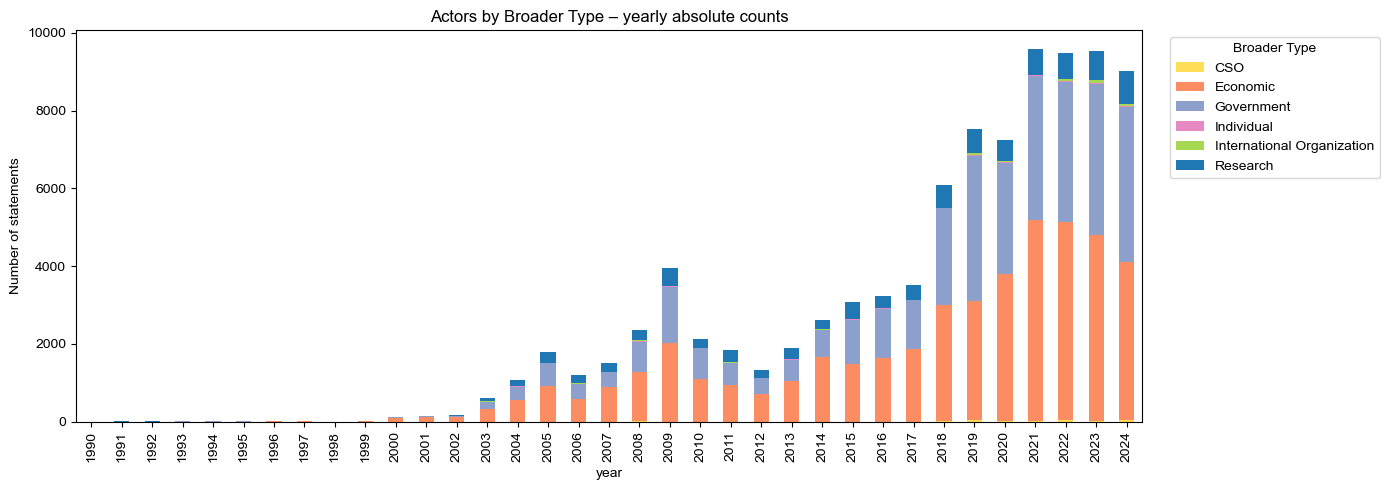

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ─────────────────────────────────────────────
# 0) 연도-별 Broader Type 절대 건수 피벗
# ─────────────────────────────────────────────
pivot_cnt = (
    df.groupby(["year", "broader_type"])["statement"]   # ‘statement’ 대신 행 개수 셀 컬럼
      .count()                                          # → 절대 건수
      .unstack(fill_value=0)                            # year × broader_type 매트릭스
      .sort_index()
)

# ─────────────────────────────────────────────
# 1) 기본 팔레트 + 강제 색상 매핑
# ─────────────────────────────────────────────
base_colors = sns.color_palette("Set2", n_colors=len(pivot_cnt.columns))

color_map = {col: base_colors[i] for i, col in enumerate(pivot_cnt.columns)}
color_map.update({
    "Research": "#1f77b4",
    "CSO"     : "#ffdd57",
})
bar_colors = [color_map[col] for col in pivot_cnt.columns]

# ─────────────────────────────────────────────
# 2) 누적 막대그래프 (절대값)
# ─────────────────────────────────────────────
pivot_cnt.plot(kind="bar",
               stacked=True,
               figsize=(14, 5),
               color=bar_colors)

plt.title("Actors by Broader Type – yearly absolute counts")
plt.ylabel("Number of statements")
plt.legend(title="Broader Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


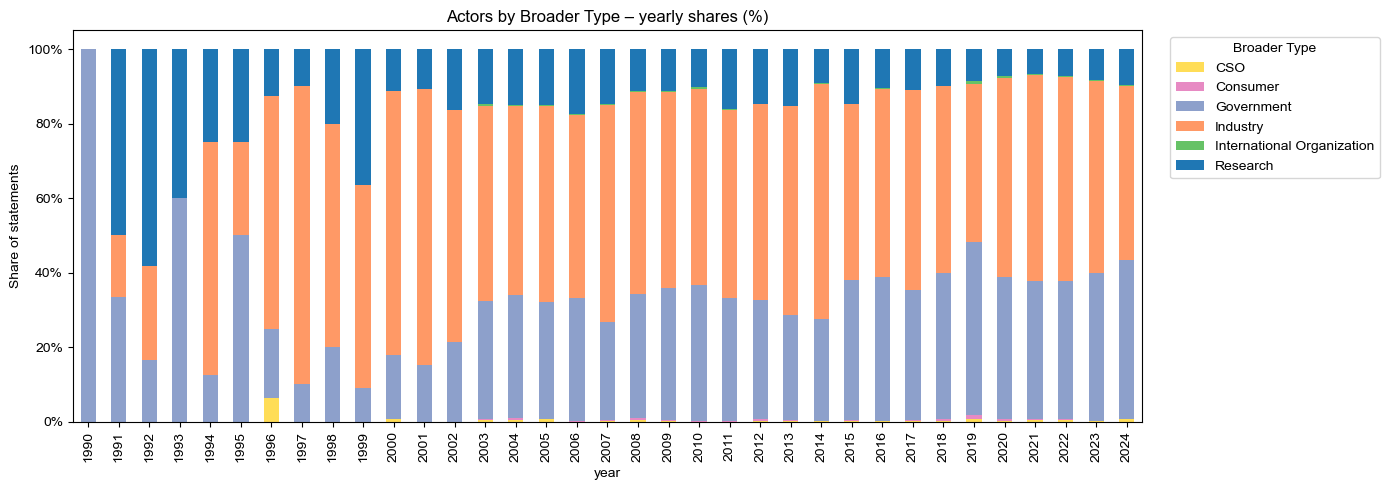

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# ─────────────────────────────────────────────
# 0) 연도-별 Broader Type 절대 건수 피벗
# ─────────────────────────────────────────────
pivot_cnt = (
    df.groupby(["year", "broader_type"])["statement"]      # ‘statement’ 대신 행 개수 셀 컬럼
      .count()                                             # → 절대 건수
      .unstack(fill_value=0)                               # year × broader_type 매트릭스
      .sort_index()
)

# ─────────────────────────────────────────────
# 1) 절대 건수 → 연도-내 비율(0–1) 변환
# ─────────────────────────────────────────────
pivot_pct = pivot_cnt.div(pivot_cnt.sum(axis=1), axis=0)   # 각 연도별 합=1

# ─────────────────────────────────────────────
# 2) 색상 팔레트 (필요하면 강제 매핑)
# ─────────────────────────────────────────────
base_colors = sns.color_palette("Set2", n_colors=len(pivot_pct.columns))

#color_map = {col: base_colors[i] for i, col in enumerate(pivot_pct.columns)}
#color_map.update({
# ───────── 2) Broader Type 컬러 매핑 ─────────
color_map = {
    "Industry"               : "#ff9966",
    "Government"             : "#8da0cb",
    "Research"               : "#1f77b4",
    "CSO"                    : "#ffdd57",
    "International Organization": "#66c266",
    "Consumer"             : "#e78ac3",
}
bar_colors = [color_map[c] for c in pivot_cnt.columns]


# ─────────────────────────────────────────────
# 3) 누적 막대그래프 (비율)
# ─────────────────────────────────────────────
ax = pivot_pct.plot(kind="bar",
                    stacked=True,
                    figsize=(14, 5),
                    color=bar_colors)

# y축을 백분율(% 단위)로 표시
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # 1.0 = 100%

plt.title("Actors by Broader Type – yearly shares (%)")
plt.ylabel("Share of statements")
plt.legend(title="Broader Type", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [6]:
#1-2. 트리맵/파이 : 최근 5년간 세부분류(specific_type) + 국가(country)
latest = df[df["year"]>=df["year"].max()-4]
counts  = latest.groupby(["country","specific_type"]).size().reset_index(name="count")

fig = px.treemap(counts, path=["country","specific_type"], values="count",
                 title="Actor composition (last 5 yrs)")
fig.show()


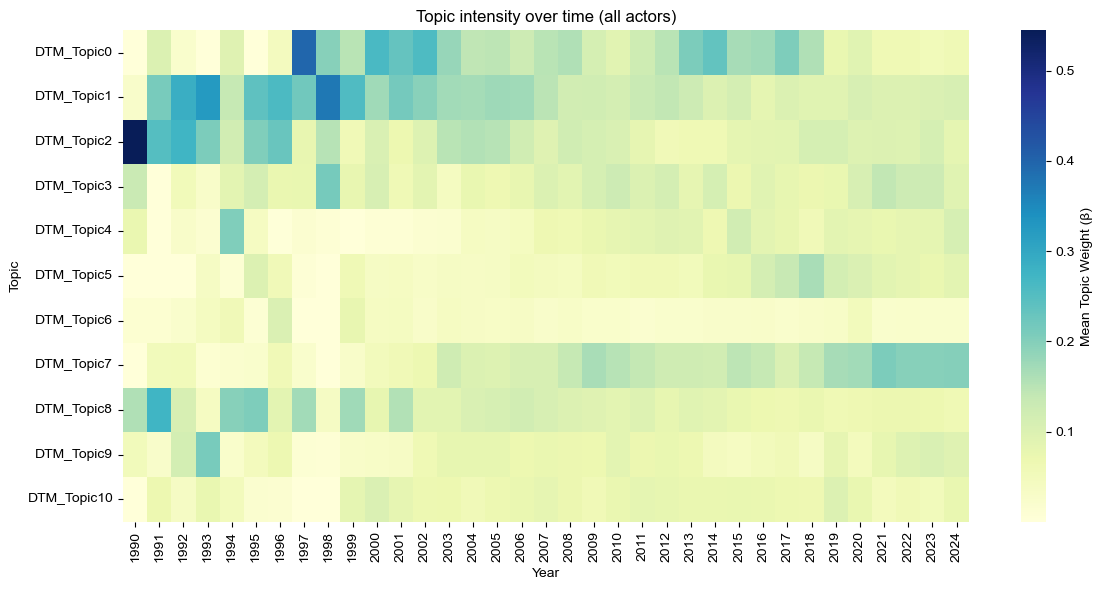

In [45]:
topic_trend = df.groupby("year")[topic_cols].mean()

# Heat-map(연도×토픽)
plt.figure(figsize=(12,6))
sns.heatmap(topic_trend.T, cmap="YlGnBu", cbar_kws={"label":"Mean Topic Weight (β)"})
plt.title("Topic intensity over time (all actors)")
plt.xlabel("Year"); plt.ylabel("Topic"); plt.tight_layout(); plt.show()


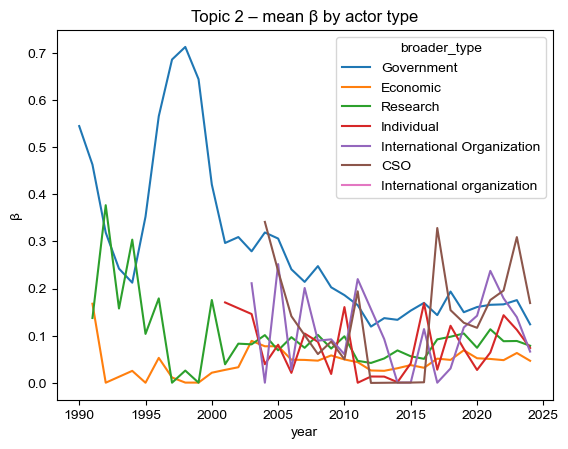

In [46]:
#행위자 상위분류별 비교 (예: Government vs Economic)
trend_by_actor = (
    df.groupby(["year","broader_type"])[topic_cols].mean()
      .reset_index()
      .melt(id_vars=["year","broader_type"], var_name="topic", value_name="beta")
)

# 한 토픽만 예시 – Topic 2
sns.lineplot(data=trend_by_actor[trend_by_actor["topic"]=="DTM_Topic2"],
             x="year", y="beta", hue="broader_type")
plt.title("Topic 2 – mean β by actor type"); plt.ylabel("β"); plt.show()


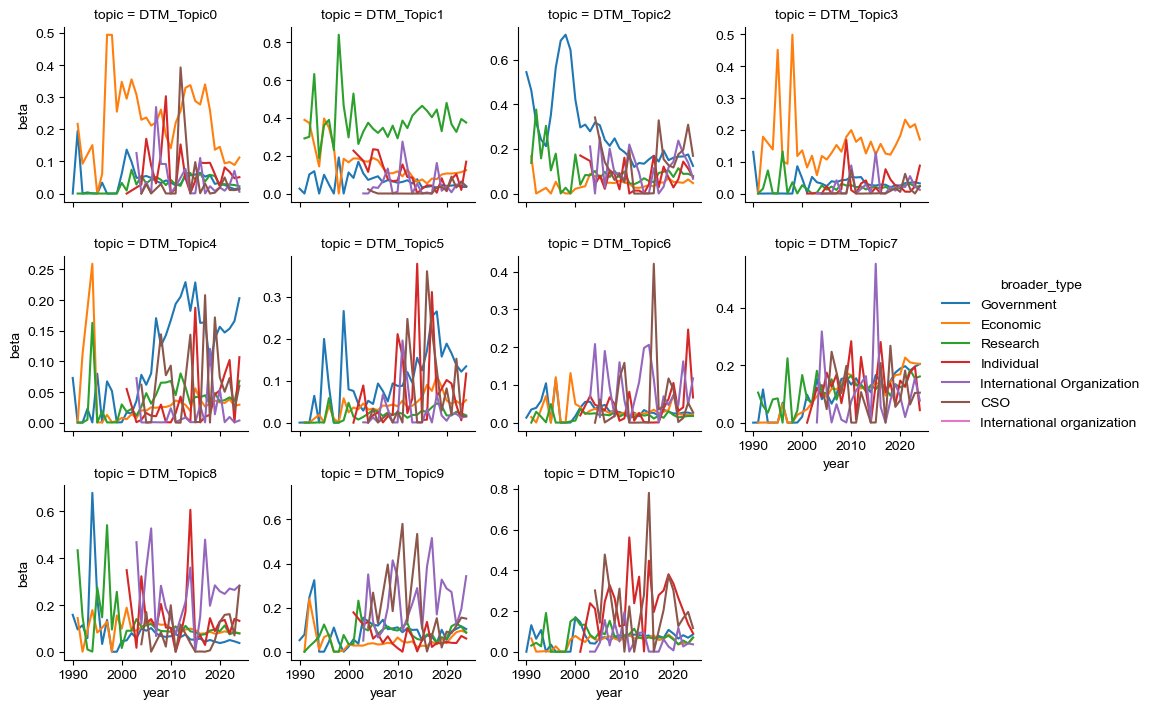

In [47]:
g = sns.FacetGrid(trend_by_actor, col="topic", col_wrap=4, hue="broader_type",
                  sharey=False, height=2.4)
g.map(sns.lineplot, "year", "beta").add_legend()


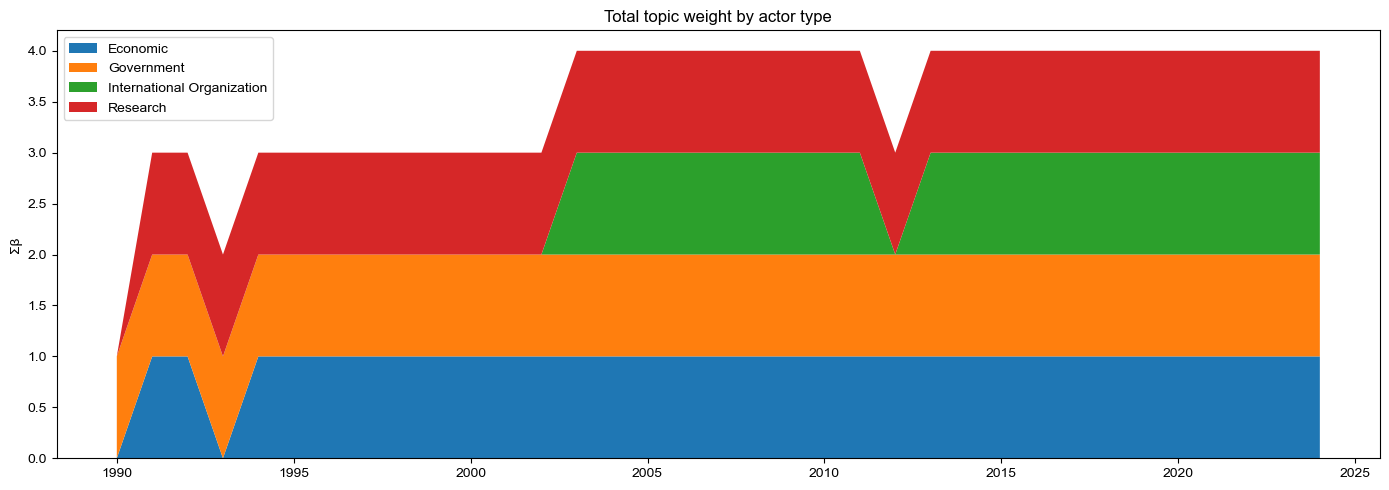

In [48]:
# ① 연도별 토픽합 → 가장 큰 actor N 선정
total_weight = df.groupby("broader_type")[topic_cols].sum().sum(axis=1)
topN = total_weight.nlargest(4).index       # 상위 4개(예)

# ② 스트림(면적) 차트용 집계
stack_data = (
    df[df["broader_type"].isin(topN)]
      .groupby(["year", "broader_type"])[topic_cols].mean()  # (연도, actor) × 토픽
      .sum(axis=1)                     # ← 열(토픽들) 방향 합계, axis=1
      .unstack(fill_value=0)           # broader_type → 열로 전개
      .sort_index()                    # 연도 기준 정렬
)

# ③ 시각화
plt.figure(figsize=(14,5))
plt.stackplot(stack_data.index, stack_data.T, labels=stack_data.columns)
plt.legend(loc="upper left")
plt.title("Total topic weight by actor type")
plt.ylabel("Σβ")
plt.tight_layout()
plt.show()


In [103]:
# ── 연도 × broader_type × specific_type 카운트 ──────────────
agg = (
    df.groupby(["year", "broader_type", "specific_type"])
      .size()
      .reset_index(name="count")
)

# 편의상 전체 pivot(히트맵용)도 미리 만들어 둡니다
pivot_all = (
    agg.pivot_table(index=["broader_type", "specific_type"],
                    columns="year", values="count", fill_value=0)
)


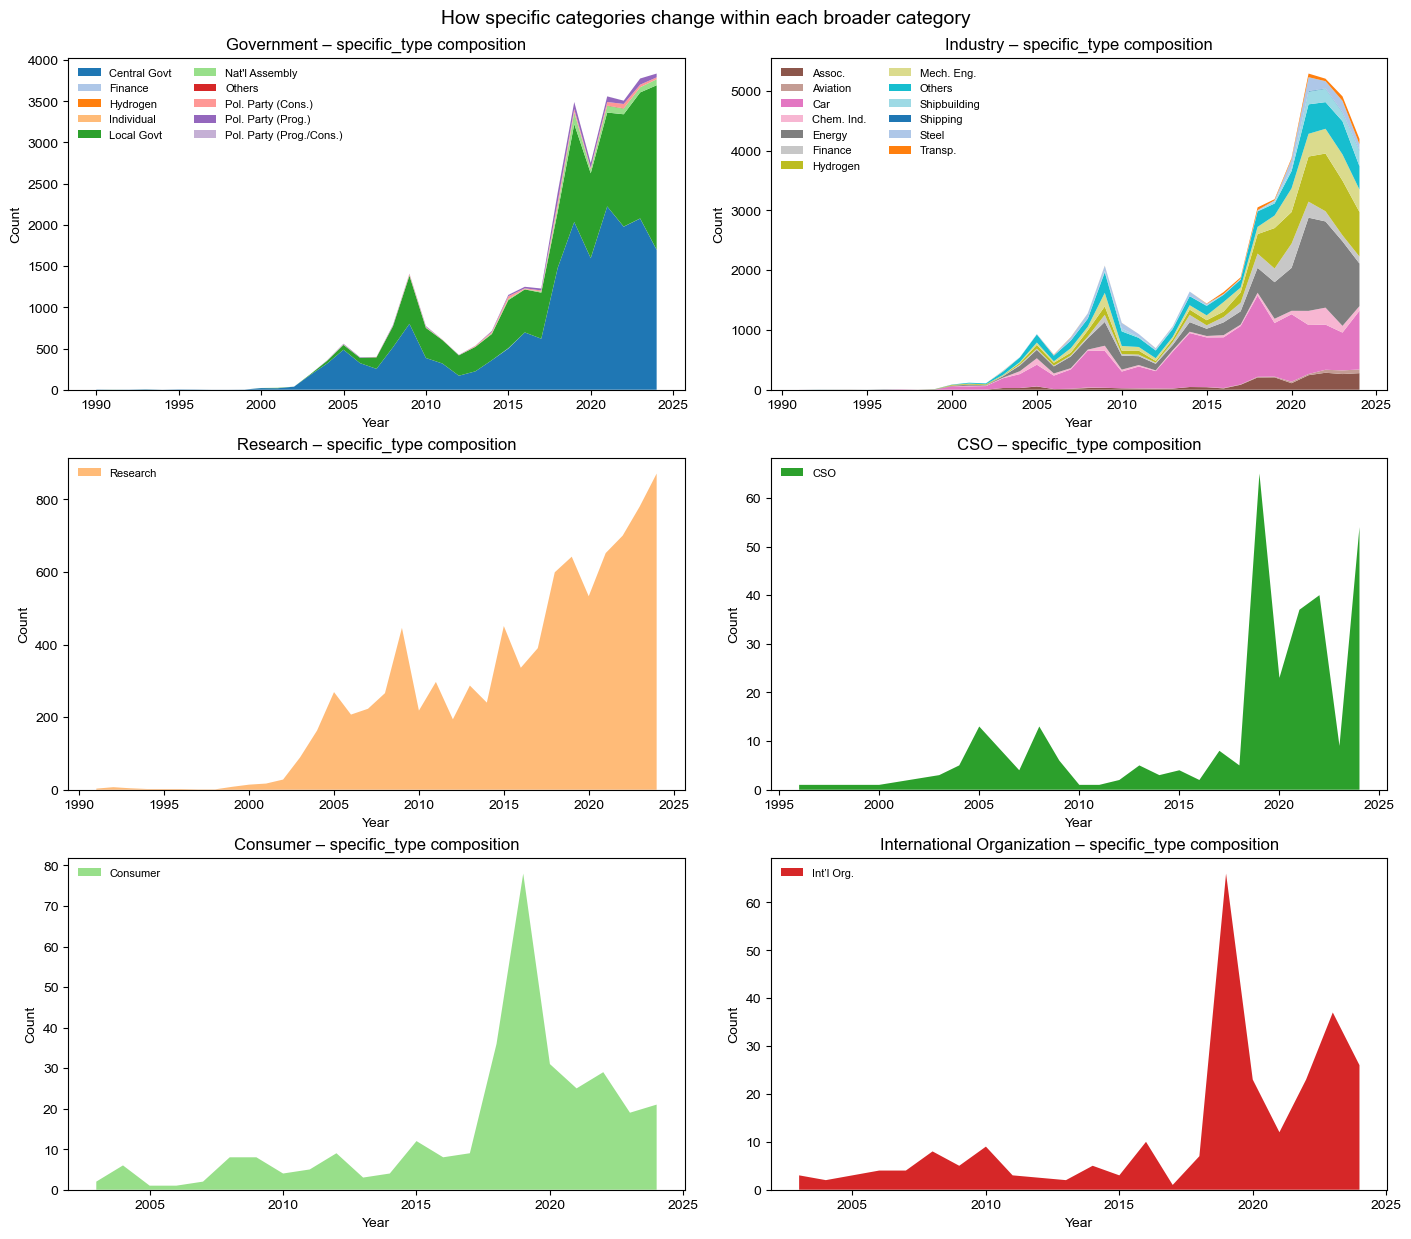

In [12]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# 1) 파일 경로
INFILE = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx"

# 2) 데이터 읽기 ----------------------------------------------------------
df = pd.read_excel(INFILE)

# (예시) 필요한 컬럼만 선택 & 집계
# ───────────────────────────────────────
# year, broader_type, specific_type 가 이미 있다면 ↓ 그대로 사용
agg = (df
       .groupby(['year', 'broader_type', 'specific_type'])
       .size()
       .reset_index(name='count'))

# 3) 시각화 --------------------------------------------------------------
palette_cycle = cycle(sns.color_palette("tab20").as_hex())

b_types = agg["broader_type"].unique()
n_panels = len(b_types)

# 자동 행‧열 계산(cols=2 고정)
n_cols = 2
n_rows = math.ceil(n_panels / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(7 * n_cols, 4 * n_rows),
    constrained_layout=True,
    sharex=False, sharey=False
)

axes = axes.flatten()

for ax, b_type in zip(axes, b_types):
    sub = agg[agg["broader_type"] == b_type]
    stack = (sub
             .pivot_table(index="year",
                          columns="specific_type",
                          values="count",
                          fill_value=0)
             .sort_index())

    ax.stackplot(
        stack.index,
        stack.T,
        labels=stack.columns,
        colors=[next(palette_cycle) for _ in stack.columns]
    )
    ax.set_title(f"{b_type} – specific_type composition")
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")
    ax.legend(fontsize=8, loc="upper left",
              ncol=2, frameon=False)

# 남는 축 숨기기
for ax in axes[len(b_types):]:
    ax.set_visible(False)

fig.suptitle("How specific categories change within each broader category",
             y=1.02, fontsize=14)
plt.show()


In [ ]:
import pandas as pd, numpy as np, os

# ───────────────────────────────────────────────
# 1) 경로 설정 ── 필요하면 본인 PC 경로로 수정하세요
# ───────────────────────────────────────────────
INFILE  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx"

OUTDIR  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계"
OUTFILE = os.path.join(OUTDIR, "actor_composition_summary.xlsx")   # ← ★파일명까지!

# ───────────────────────────────────────────────
# 2) 폴더가 없으면 생성
# ───────────────────────────────────────────────
os.makedirs(OUTDIR, exist_ok=True)

# ───────────────────────────────────────────────
# 3) 국내·국외 판단용 세트
# ───────────────────────────────────────────────
KOREA_NAMES = {"대한민국", "Republic of Korea", "Korea", "South Korea"}

# ───────────────────────────────────────────────
# 4) 데이터 로드 & 국내/국외 구분
# ───────────────────────────────────────────────
df = pd.read_excel(INFILE)
df["domestic"] = np.where(df["country"].isin(KOREA_NAMES), "국내", "국외")

# ───────────────────────────────────────────────
# 5) 전체 요약
# ───────────────────────────────────────────────
total_cnt = df.groupby("domestic").size().to_frame("count")
total_cnt["pct"] = total_cnt["count"] / total_cnt["count"].sum() * 100

# ───────────────────────────────────────────────
# 6) 브로드 카테고리 요약
# ───────────────────────────────────────────────
broad_cnt = df.groupby(["domestic", "broader_type"]).size().unstack(fill_value=0)
broad_pct = broad_cnt.div(broad_cnt.sum(axis=1), axis=0) * 100
broad_tbl = pd.concat(
    [broad_cnt.add_suffix("_count"), broad_pct.add_suffix("_pct")], axis=1
).sort_index(axis=1)

# ───────────────────────────────────────────────
# 7) 세부(specific) 카테고리 요약
# ───────────────────────────────────────────────
spec_cnt = df.groupby(["domestic", "specific_type"]).size().unstack(fill_value=0)
spec_pct = spec_cnt.div(spec_cnt.sum(axis=1), axis=0) * 100
spec_tbl = pd.concat(
    [spec_cnt.add_suffix("_count"), spec_pct.add_suffix("_pct")], axis=1
).sort_index(axis=1)

# ───────────────────────────────────────────────
# 8) Excel 저장 (시트 3개)
# ───────────────────────────────────────────────
with pd.ExcelWriter(OUTFILE) as w:
    total_cnt.to_excel(w, sheet_name="total")
    broad_tbl.to_excel(w, sheet_name="broad")
    spec_tbl.to_excel(w, sheet_name="specific")

# ───────────────────────────────────────────────
# 9) 콘솔 미리보기
# ───────────────────────────────────────────────
print("[전체]\n", total_cnt.round(1))
print("\n[브로드]\n", broad_tbl.round(1).T)
print("\n[세부] (상위 20열)\n", spec_tbl.round(1).T.head(20))
print("\n✅ Excel 저장 완료 →", OUTFILE)


[전체]
           count   pct
domestic             
국내        80884  88.7
국외        10325  11.3

[브로드]
 domestic                               국내      국외
broader_type                                     
CSO_count                           225.0    12.0
CSO_pct                               0.3     0.1
Economic_count                    39280.0  7434.0
Economic_pct                         48.6    72.0
Government_count                  32709.0  2054.0
Government_pct                       40.4    19.9
Individual_count                    241.0    45.0
Individual_pct                        0.3     0.4
International Organization_count     21.0   309.0
International Organization_pct        0.0     3.0
Research_count                     8408.0   471.0
Research_pct                         10.4     4.6

[세부] (상위 20열)
 domestic                              국내      국외
specific_type                                   
Aviation_count                     191.0   179.0
Aviation_pct                       

In [10]:
import pandas as pd, numpy as np, os

# ───────────────────────────────────────────────
# 1) 경로
# ───────────────────────────────────────────────
INFILE  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx"

OUTDIR  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계"
OUTFILE = os.path.join(OUTDIR, "actor_composition_summary_total.xlsx")

os.makedirs(OUTDIR, exist_ok=True)

# ───────────────────────────────────────────────
# 2) 데이터 준비
# ───────────────────────────────────────────────
KOREA = {"대한민국", "Republic of Korea", "Korea", "South Korea"}
df = pd.read_excel(INFILE)
df["domestic"] = np.where(df["country"].isin(KOREA), "국내", "국외")

# 집계
g = (
    df.groupby(["broader_type", "specific_type", "domestic", "country"])
      .size()
      .to_frame("count")
      .reset_index()
)

# 국내/국외 내부 비율  ― transform으로 인덱스 맞추기
g["pct_domestic"] = (
    g["count"] / g.groupby("domestic")["count"].transform("sum") * 100
)

# ───────────────────────────────────────────────
# 3) 피벗(count / pct)
# ───────────────────────────────────────────────
pivot_cnt = g.pivot_table(
    index=["broader_type", "specific_type"],
    columns=["domestic", "country"],
    values="count",
    fill_value=0,
)

pivot_pct = g.pivot_table(
    index=["broader_type", "specific_type"],
    columns=["domestic", "country"],
    values="pct_domestic",
    fill_value=0,
)

# ───────────────────────────────────────────────
# 4) 열 평탄화 + suffix
# ───────────────────────────────────────────────
pivot_cnt.columns = [f"{dom}_{cty}_cnt" for dom, cty in pivot_cnt.columns]
pivot_pct.columns = [f"{dom}_{cty}_pct" for dom, cty in pivot_pct.columns]

tbl = pd.concat([pivot_cnt, pivot_pct], axis=1).sort_index(axis=1)

# ───────────────────────────────────────────────
# 5) 저장
# ───────────────────────────────────────────────
tbl.to_excel(OUTFILE, sheet_name="all")
print("✅ Excel 저장:", OUTFILE)


✅ Excel 저장: C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\actor_composition_summary_total.xlsx


In [14]:
import pandas as pd, numpy as np, os

# ────────────────────────────────────────────
# 1) 경로
# ────────────────────────────────────────────
INFILE  = (r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx")

OUTDIR  = (r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계")
OUTFILE = os.path.join(OUTDIR, "actor_composition_summary_total.xlsx")
os.makedirs(OUTDIR, exist_ok=True)

# ────────────────────────────────────────────
# 2) 데이터 + Korea / Other 구분
# ────────────────────────────────────────────
KOREA = {"대한민국", "Republic of Korea", "Korea", "South Korea"}

df = pd.read_excel(INFILE)
df["group"] = np.where(df["country"].isin(KOREA), "Korea", "OtherCountries")

# ────────────────────────────────────────────
# 3) (broader, specific) × group  문서 수 집계
#    → 빠진 열을 강제로 0으로 채움
# ────────────────────────────────────────────
cnt_tbl = (
    df.groupby(["broader_type", "specific_type", "group"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=["Korea", "OtherCountries"], fill_value=0)  # <- 핵심
      .rename(columns={"Korea": "Korea_cnt",
                       "OtherCountries": "Other_cnt"})
)

# ────────────────────────────────────────────
# 4) 비율(%) 계산
# ────────────────────────────────────────────
row_sum = cnt_tbl.sum(axis=1).replace(0, np.nan)  # 0으로 나누기 방지
cnt_tbl["Korea_pct"] = cnt_tbl["Korea_cnt"] / row_sum * 100
cnt_tbl["Other_pct"] = cnt_tbl["Other_cnt"] / row_sum * 100
cnt_tbl = cnt_tbl.fillna(0)

# ────────────────────────────────────────────
# 5) OtherCountries에 포함된 '국가 개수' 세기
# ────────────────────────────────────────────
n_countries = (
    df[df["group"] == "OtherCountries"]
      .groupby(["broader_type", "specific_type"])["country"]
      .nunique()
      .rename("Other_nCountries")
)

tbl = (
    cnt_tbl.join(n_countries, how="left")
           .fillna({"Other_nCountries": 0})
           .astype({"Other_nCountries": int})
)

# ────────────────────────────────────────────
# 6) 열 정렬
# ────────────────────────────────────────────
tbl = tbl[["Korea_cnt", "Korea_pct",
           "Other_cnt", "Other_pct", "Other_nCountries"]]

# ────────────────────────────────────────────
# 7) 총계(Grand Total) 행 추가
# ────────────────────────────────────────────
gt_cnt_kor   = tbl["Korea_cnt"].sum()
gt_cnt_other = tbl["Other_cnt"].sum()
gt_tot       = gt_cnt_kor + gt_cnt_other

grand_row = pd.Series({
    "Korea_cnt"       : gt_cnt_kor,
    "Korea_pct"       : gt_cnt_kor / gt_tot * 100 if gt_tot else 0,
    "Other_cnt"       : gt_cnt_other,
    "Other_pct"       : gt_cnt_other / gt_tot * 100 if gt_tot else 0,
    "Other_nCountries": df.loc[df["group"] == "OtherCountries", "country"].nunique()
}, name=("Total", "Total"))

tbl = pd.concat([tbl, grand_row.to_frame().T])

# ────────────────────────────────────────────
# 8) 저장
# ────────────────────────────────────────────
tbl.to_excel(OUTFILE, sheet_name="all")
print("✅ Excel 저장:", OUTFILE)


✅ Excel 저장: C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\actor_composition_summary_total.xlsx


In [19]:
import pandas as pd, numpy as np, os, re

# ────────────────────────────────────────────
# 1) 이거 최종사용 경로
# ────────────────────────────────────────────
INFILE = (r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값"
          r"\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계"
          r"\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx")

OUTDIR = (r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값"
          r"\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계")
OUTFILE = os.path.join(OUTDIR, "actor_composition_summary_total_ver5.xlsx")
os.makedirs(OUTDIR, exist_ok=True)

# ────────────────────────────────────────────
# 2) 데이터 로드 + Korea / OtherCountries 구분
#    (괄호·ISO 제거 후 판별)
# ────────────────────────────────────────────
df = pd.read_excel(INFILE)

# 괄호 이하 제거 → "South Korea"
df["country_clean"] = df["country"].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()

df["group"] = np.where(
    df["country_clean"].isin({"South Korea", "Republic of Korea", "Korea", "대한민국"}),
    "Korea",
    "OtherCountries"
)

# ────────────────────────────────────────────
# 3) (broader, specific) × group 카운트
#    ─ 빠진 열 강제 확보 ─
# ────────────────────────────────────────────
cnt_tbl = (
    df.groupby(["broader_type", "specific_type", "group"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=["Korea", "OtherCountries"], fill_value=0)
      .rename(columns={"Korea": "Korea_cnt",
                       "OtherCountries": "Other_cnt"})
)

# ────────────────────────────────────────────
# 4) 전체 합계로 비율(%) 계산
# ────────────────────────────────────────────
total_korea = cnt_tbl["Korea_cnt"].sum()
total_other = cnt_tbl["Other_cnt"].sum()

cnt_tbl["Korea_pct"] = (cnt_tbl["Korea_cnt"] / total_korea * 100
                        if total_korea else 0)
cnt_tbl["Other_pct"] = (cnt_tbl["Other_cnt"] / total_other * 100
                        if total_other else 0)

# ────────────────────────────────────────────
# 5) OtherCountries에 포함된 국가 수
# ────────────────────────────────────────────
n_countries = (
    df[df["group"] == "OtherCountries"]
      .groupby(["broader_type", "specific_type"])["country_clean"]
      .nunique()
      .rename("Other_nCountries")
)

tbl = (
    cnt_tbl.join(n_countries, how="left")
           .fillna({"Other_nCountries": 0})
           .astype({"Other_nCountries": int})
)[["Korea_cnt", "Korea_pct",
   "Other_cnt", "Other_pct", "Other_nCountries"]]

# ────────────────────────────────────────────
# 6) 총계(Grand Total) 행 추가
# ────────────────────────────────────────────
grand_row = pd.Series({
    "Korea_cnt": total_korea,
    "Korea_pct": 100.0 if total_korea else 0,
    "Other_cnt": total_other,
    "Other_pct": 100.0 if total_other else 0,
    "Other_nCountries": df.loc[df["group"] == "OtherCountries",
                               "country_clean"].nunique()
}, name=("Total", "Total"))

tbl = pd.concat([tbl, grand_row.to_frame().T])

# ────────────────────────────────────────────
# 7) 저장
# ────────────────────────────────────────────
tbl.to_excel(OUTFILE, sheet_name="all")
print("✅ Excel 저장:", OUTFILE)


✅ Excel 저장: C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계\actor_composition_summary_total_ver5.xlsx


In [22]:
import re
import pandas as pd
import numpy as np

# ─────────────────────────────────────────
# 파일 읽기 (경로는 동일)
# ─────────────────────────────────────────
df = pd.read_excel(r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값"
                   r"\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\actor 별 통계"
                   r"\DTM_Doc_Topic_Distribution_20250523기준최종업데이트_1st revision_Na제거 - 복사본.xlsx")

# 열 이름 맞추기
df = df.rename(columns={'year': 'Year',
                        'broader_type': 'Broad Type',
                        'country': 'Country'})

# 빈 셀은 한국으로 간주
df['Country'] = df['Country'].replace(r'^\s*$', np.nan, regex=True)
df['Country'] = df['Country'].fillna('South Korea')

# ─────────────────────────────────────────
# “South Korea (KR)” → “South Korea” 로 정규화
# ─────────────────────────────────────────
def normalize_country(val: str) -> str:
    """괄호와 뒷부분 제거, 앞뒤 공백 정리"""
    if pd.isna(val):
        return val
    # 괄호 안 내용 제거 → 'South Korea (KR)' → 'South Korea'
    val = re.sub(r'\(.*?\)', '', str(val))
    return val.strip()

df['Country_norm'] = df['Country'].apply(normalize_country).str.lower()

# ─────────────────────────────────────────
# Region 라벨링
#  - south korea / republic of korea / 대한민국 → Korea
#  - 나머지 → Other
# ─────────────────────────────────────────
def region_label(s: str) -> str:
    if pd.isna(s):
        return 'Korea'          # 이미 빈 셀은 한국으로 채워뒀음
    if any(key in s for key in
           ['south korea', 'republic of korea', '대한민국']):
        return 'Korea'
    if 'north korea' in s:      # 구분 필요하면 추가
        return 'Other'
    return 'Other'

df['Region'] = df['Country_norm'].apply(region_label)

# ─────────────────────────────────────────
# 이후 과정은 동일 (집계 & Excel 저장)
# ─────────────────────────────────────────
grp = (df.groupby(['Region', 'Year', 'Broad Type'])
         .size()
         .reset_index(name='Count'))

grp['Percent'] = grp['Count'] / grp.groupby(
    ['Region', 'Year'])['Count'].transform('sum') * 100

with pd.ExcelWriter("broader_type_by_year_kor_other.xlsx",
                    engine='xlsxwriter') as writer:
    for region in ['Korea', 'Other']:
        reg_df = grp[grp['Region'] == region]

        (reg_df.pivot(index='Year', columns='Broad Type', values='Count')
              .fillna(0).astype(int)
              .add_suffix('_count')
              .join(
                  reg_df.pivot(index='Year', columns='Broad Type',
                               values='Percent')
                        .fillna(0).round(2)
                        .add_suffix('_pct')
              )
              .sort_index(axis=1)
              .to_excel(writer, sheet_name=region))

print("✅ Korea·Other 두 시트에 값이 제대로 들어갔는지 확인해 보세요!")


✅ Korea·Other 두 시트에 값이 제대로 들어갔는지 확인해 보세요!


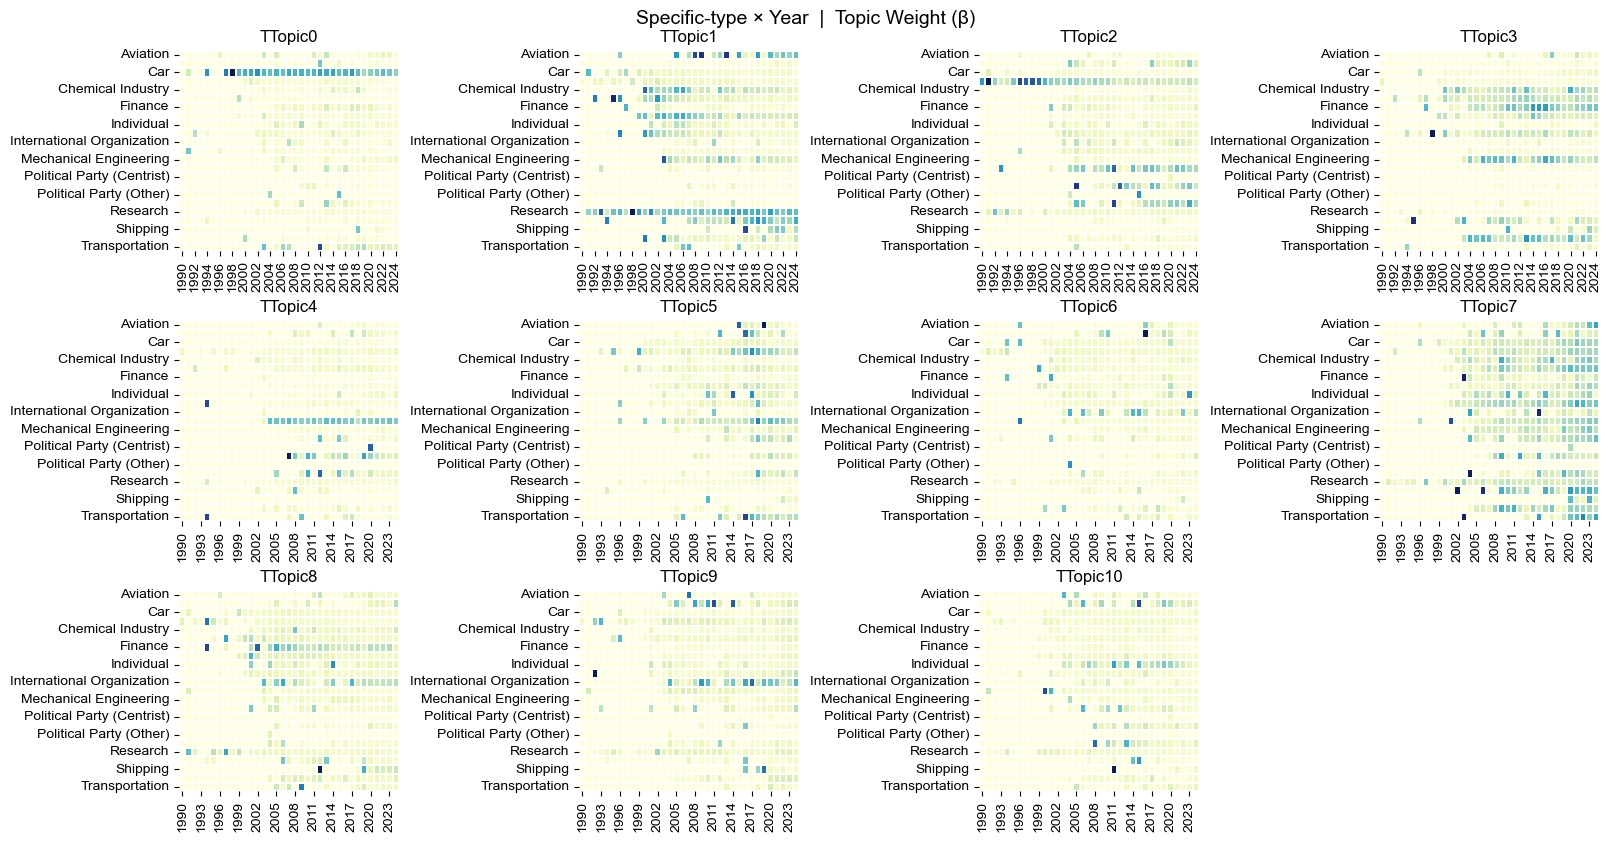

✅  Heatmap 그림 저장 → C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\SpecificType_TopicWeights_Heatmaps.png


In [75]:


"""
────────────────────────────────────────────────────────────────────
Specific-type × Topic 가중치(β) 변화   ‒   Excel 저장 + 전체 Heatmap
────────────────────────────────────────────────────────────────────
1) 연도(year) · 세부유형(specific_type) 단위로 각 토픽의 평균 β 집계
2) 토픽별 시트가 들어 있는 Excel 파일(다운로드용) 생성
3) 11개 토픽을 모두 한눈에 보는 heatmap 패널 그림 저장
   • x축 = 연도, y축 = specific_type
   • 색 = 평균 β (0~1 스케일)
────────────────────────────────────────────────────────────────────
"""

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ───────────────────────────────────────────
# 0) 경로 설정
# ───────────────────────────────────────────
INFILE  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\DTM_Doc_Topic_Distribution_edited_actor.xlsx"
OUTDIR  = r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리"
os.makedirs(OUTDIR, exist_ok=True)

OUT_XLSX = os.path.join(OUTDIR, "SpecificType_TopicWeights_1990-2024.xlsx")
OUT_PNG  = os.path.join(OUTDIR, "SpecificType_TopicWeights_Heatmaps.png")

# ───────────────────────────────────────────
# 1) 데이터 로드 & 토픽 컬럼
# ───────────────────────────────────────────
df = pd.read_excel(INFILE)
topic_cols = [c for c in df.columns if c.startswith("DTM_Topic")]

# ───────────────────────────────────────────
# 2) 연도×specific_type 평균 β 집계
# ───────────────────────────────────────────
agg = (
    df.groupby(["year", "specific_type"])[topic_cols]
      .mean()
      .reset_index()
)

# ───────────────────────────────────────────
# 3) Excel 저장  (토픽마다 한 시트)
# ───────────────────────────────────────────
# ── 3) Excel 저장 (토픽마다 한 시트) ─────────────────────
with pd.ExcelWriter(OUT_XLSX, engine="openpyxl") as writer:
    for t in topic_cols:
        sheet = agg.pivot_table(
            index="year", columns="specific_type",
            values=t, fill_value=0
        )
        sheet.to_excel(writer, sheet_name=t.replace("DTM_", "T"))
    agg.to_excel(writer, sheet_name="LongTable", index=False)


# ───────────────────────────────────────────
# 4) 전체 토픽 Heatmap 패널
# ───────────────────────────────────────────
n_topics = len(topic_cols)
ncols    = 4
nrows    = int(np.ceil(n_topics / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 2.7*nrows),
    constrained_layout=True
)
axes = axes.flatten()

for ax, t in zip(axes, topic_cols):
    pv = agg.pivot_table(
        index="specific_type", columns="year",
        values=t, fill_value=0
    )
    sns.heatmap(
        pv, ax=ax, cmap="YlGnBu",
        cbar=False, linewidths=.3
    )
    ax.set_title(t.replace("DTM_", "T"))
    ax.set_xlabel(""); ax.set_ylabel("")

# 빈 축 제거
for ax in axes[len(topic_cols):]:
    ax.axis("off")

fig.suptitle("Specific-type × Year  |  Topic Weight (β)", fontsize=14, y=1.02)
fig.savefig(OUT_PNG, dpi=300, bbox_inches="tight")
plt.show()

print("✅  Heatmap 그림 저장 →", OUT_PNG)


In [79]:
"""
────────────────────────────────────────────────────────────────────────────
Specific-type별  연도×토픽 가중치(β) 표를
각각 “한 시트”로 저장하는 Excel 생성 스크립트
────────────────────────────────────────────────────────────────────────────
"""

import os, re
import pandas as pd

# ───────────────────────────────────────────
# 1) 경로 설정
# ───────────────────────────────────────────
INFILE = (
    r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값"
    r"\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리"
    r"\DTM_Doc_Topic_Distribution_edited_actor.xlsx"
)
OUTDIR = (
    r"C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값"
    r"\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리"
)
os.makedirs(OUTDIR, exist_ok=True)
OUTFILE = os.path.join(
    OUTDIR, "SpecificType_TopicWeights_1990-2024_per category.xlsx"
)

# ───────────────────────────────────────────
# 2) 데이터 로드 & 토픽 컬럼
# ───────────────────────────────────────────
df = pd.read_excel(INFILE)
topic_cols = [c for c in df.columns if c.startswith("DTM_Topic")]

# ───────────────────────────────────────────
# 3) 시트 이름 정리 함수
# ───────────────────────────────────────────
_invalid_re = re.compile(r'[:\\/?*\[\]]')   # 금지 문자
def make_sheet_name(raw_name: str, used: set) -> str:
    """금지 문자 제거 → 31자 제한 → 중복 방지"""
    name = _invalid_re.sub("_", raw_name).strip()
    if not name:
        name = "Sheet"
    if len(name) > 31:
        name = name[:28] + "..."
    base = name
    n = 1
    while name in used:            # 중복이면 _1, _2… 붙이기
        suffix = f"_{n}"
        name = (base[:31-len(suffix)] + suffix) if len(base)+len(suffix) > 31 else base + suffix
        n += 1
    used.add(name)
    return name

# ───────────────────────────────────────────
# 4) ExcelWriter – specific_type별로 한 시트씩
# ───────────────────────────────────────────
used_names = set()
with pd.ExcelWriter(OUTFILE, engine="openpyxl") as writer:
    for spec in sorted(df["specific_type"].dropna().unique()):
        pv = (
            df[df["specific_type"] == spec]
              .groupby("year")[topic_cols]
              .mean()
              .sort_index()
        )
        sheet_name = make_sheet_name(spec, used_names)
        pv.to_excel(writer, sheet_name=sheet_name)

print("✅  Excel 저장 완료 →", OUTFILE)


✅  Excel 저장 완료 → C:\Users\Administrator\Desktop\0.졸업논문\2. Chapter 2\Data\결과값\DTM_statement per actor_뉴스기사\DTM_statement per actor\전처리\SpecificType_TopicWeights_1990-2024_per category.xlsx
